In [ ]:
pip install autoviz

In [271]:
pip install pyforest

In [272]:
import pyforest
import autoviz
import warnings
warnings.filterwarnings('ignore')

#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()
matches=pd.read_csv("/content/IPL Matches 2008-2020.csv")
matches.head()

<IPython.core.display.Javascript object>

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [273]:
matches.shape

(816, 17)

In [274]:
matches.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Since the date is not relevant and does not provide any additional insights for our analysis, we will drop this column.
umpire1, umpire2,id,city,method,player_of_match can also be dropped for same reason

In [275]:
matches["result"].value_counts().groupby(by=matches['winner'])

In [276]:
matches["date_added"] = pd.to_datetime(matches['date'])
matches.head()

<IPython.core.display.Javascript object>

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,date_added
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008-04-18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008-04-19
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008-04-19
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008-04-20
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008-04-20


In [277]:
print("\n\n All teams that participated in all IPL conducted till 2020:", matches["team1"].unique())



 All teams that participated in all IPL conducted till 2020: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [278]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,date_added
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008-04-18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008-04-19
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008-04-19
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008-04-20
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008-04-20


In [279]:
matches['season'] = matches['date_added'].dt.year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,date_added,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008-04-18,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008-04-19,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008-04-19,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008-04-20,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008-04-20,2008


In [280]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals',	
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DCA','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [281]:
matches['season'].nunique()

13

In [282]:
matches['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

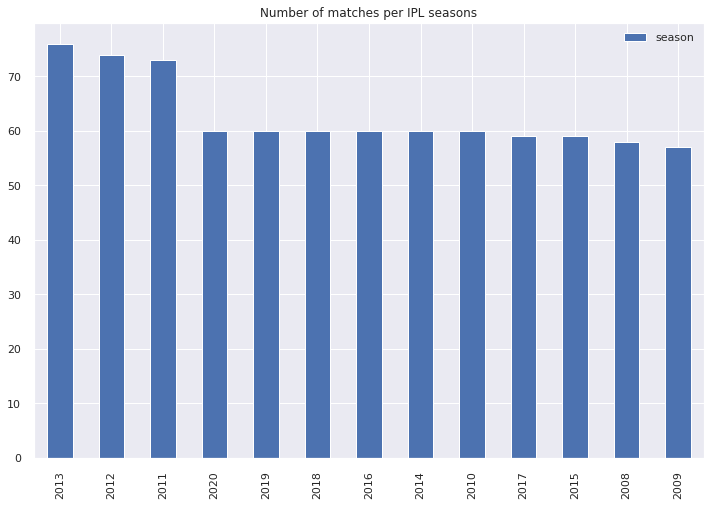

In [283]:
#number of matches per ipl season
seasons.plot(kind="bar", title="Number of matches per IPL seasons", figsize=(12,8))

In [284]:
#List the winner of each season
season_winner = matches.drop_duplicates(subset=['season'], keep='last')[['season','winner']]
season_winner.sort_values(by="season").reset_index(drop=True)

,season,winner
0,2008,RR
1,2009,DC
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


In [285]:
# How many matches were played in each season
seasons = matches['season'].value_counts().to_frame()
seasons

,season
2013,76
2012,74
2011,73
2020,60
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

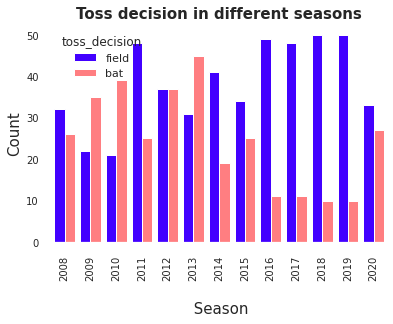

In [291]:
# Toss decision after winning the toss, Season-Wise
ax = plt.axes()
ax.set(facecolor = "white")
sns.countplot(x='season', hue='toss_decision', data=matches,palette="gnuplot2",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision in different seasons',fontsize=15,fontweight="bold")
plt.show()

In [293]:
# Win number after winning the Toss
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
matches['toss_win_game_win'].value_counts()

<IPython.core.display.Javascript object>

Yes    418
No     398
Name: toss_win_game_win, dtype: int64

In [294]:
# Win number according for the team batting first and team batting second
matches['result'].value_counts()


wickets    435
runs       364
tie         13
Name: result, dtype: int64

 times team batting second won while 364 times team batting first won in IPL 13 matches ended up in a tie

In [287]:
feature umpire1 and umpire 2
ump=pd.concat([matches['umpire1'],matches['umpire2']])
ump=ump.value_counts()
ump.head(20)

<IPython.core.display.Javascript object>

S Ravi                   121
HDPK Dharmasena           94
AK Chaudhary              87
C Shamshuddin             82
M Erasmus                 65
CK Nandan                 57
Nitin Menon               57
SJA Taufel                55
Asad Rauf                 51
VA Kulkarni               50
BNJ Oxenford              48
CB Gaffaney               47
RJ Tucker                 46
BR Doctrove               42
RE Koertzen               41
Aleem Dar                 38
BF Bowden                 37
NJ Llong                  37
KN Ananthapadmanabhan     33
RK Illingworth            31
dtype: int64

Replacing the Full names with short names for ease of access

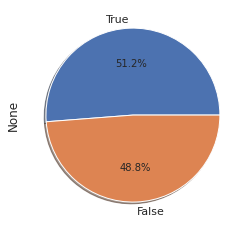

In [295]:
# Has Toss-winning helped in winning matches?
wins = matches["toss_winner"] == matches["winner"]
ax = wins.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True)

This piechart shows that winning toss actually helped to win the match as well by 51.3%

In [296]:
# toss and match wins by toss_winner
toss_winner_as_winner = matches[matches['winner'] == matches['toss_winner']].groupby(['toss_winner'])['winner'].count()
# total toss wins by toss_winner
total_toss_winner = matches.groupby(['toss_winner'])['winner'].count()
win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100
win_per_on_toss_win = win_per_on_toss_win.to_frame()
win_per_on_toss_win['lost_per_on_toss_win'] = 100 - win_per_on_toss_win['winner']
win_per_on_toss_win.rename(columns={'winner': 'win_per_on_toss_win'}, inplace=True)
win_per_on_toss_win.round(2).sort_values(by="win_per_on_toss_win", ascending=False)

,win_per_on_toss_win,lost_per_on_toss_win
toss_winner,,
GL,66.67,33.33
CSK,62.89,37.11
RPS,61.54,38.46
MI,57.55,42.45
KKR,56.12,43.88
RR,51.76,48.24
SRH,50.88,49.12
DCA,50.00,50.00
KTK,50.00,50.00


Mumbai Indians won only 55.56% of the matches in which they won the toss

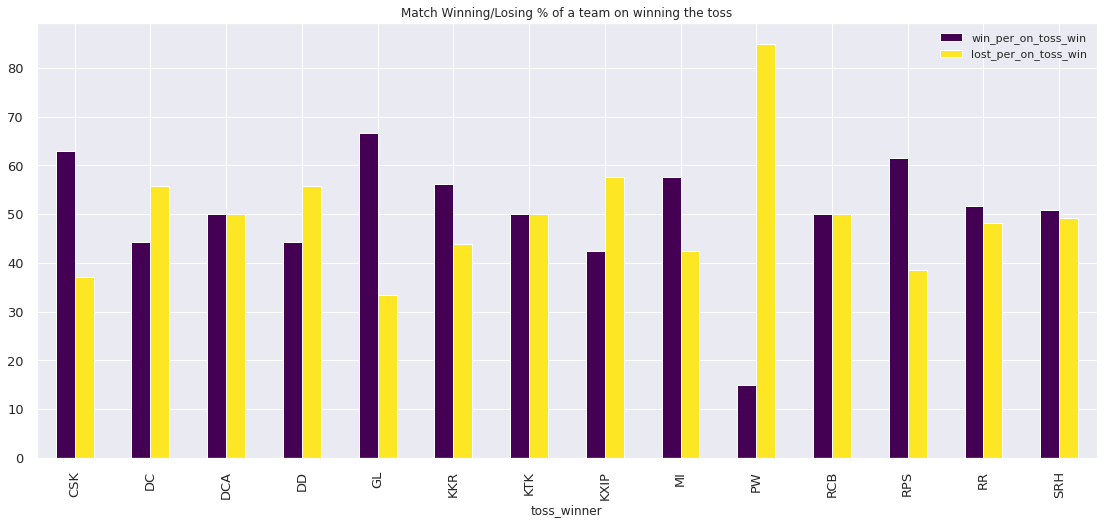

In [297]:
#winning or lossin per toss
win_per_on_toss_win.plot.bar(figsize=(19,8), title="Match Winning/Losing % of a team on winning the toss",fontsize=13,
 cmap='viridis')

In [298]:
#number of matches with respect to venue
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
Eden Gardens,77
Feroz Shah Kotla,74
Wankhede Stadium,73
M Chinnaswamy Stadium,65
"Rajiv Gandhi International Stadium, Uppal",64
"MA Chidambaram Stadium, Chepauk",57
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Dubai International Cricket Stadium,33
Sheikh Zayed Stadium,29


Eden garden Stadium has hosted most matches (77).
Wankhede Stadium is the 3th on the list and hosted 73 matches.
There were some matches played outside India as well, like in cities Kingsmead, St George’s Park, etc.

 Overview of matches played, toss won, wins, and losses for each team in the IPL history.

In [299]:
#total won and total loss
overall_team_stats = pd.DataFrame(
{'Total Matches Played': matches["team1"].value_counts() + matches["team2"].value_counts(), 
'Toss Won': matches["toss_winner"].value_counts(), "Total Won": matches["winner"].value_counts(), 
 'Total Lost': ((matches["team1"].value_counts() + matches["team2"].value_counts()) - matches["winner"].value_counts())})
overall_team_stats.sort_values(by="Total Won", ascending=False)

<IPython.core.display.Javascript object>

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,203,106,120,83
CSK,178,97,106,72
KKR,192,98,99,93
RCB,195,87,91,104
KXIP,190,85,88,102
RR,161,87,81,80
DD,161,80,67,94
SRH,124,57,66,58
DC,75,43,29,46
DCA,33,20,19,14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

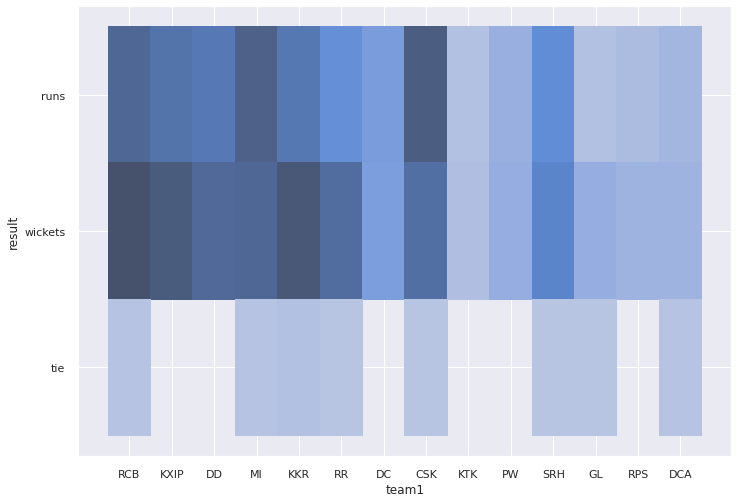

In [300]:
#histplot team1
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x='team1',y='result',data=matches) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

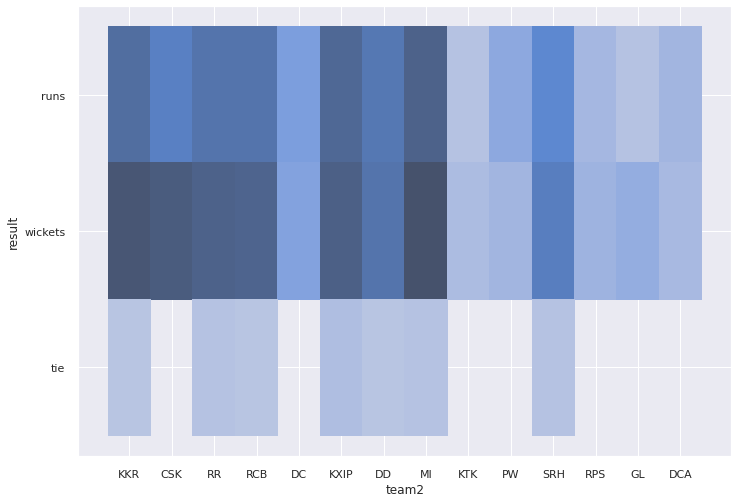

In [301]:
#histplot team2
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x='team2',y='result',data=matches)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

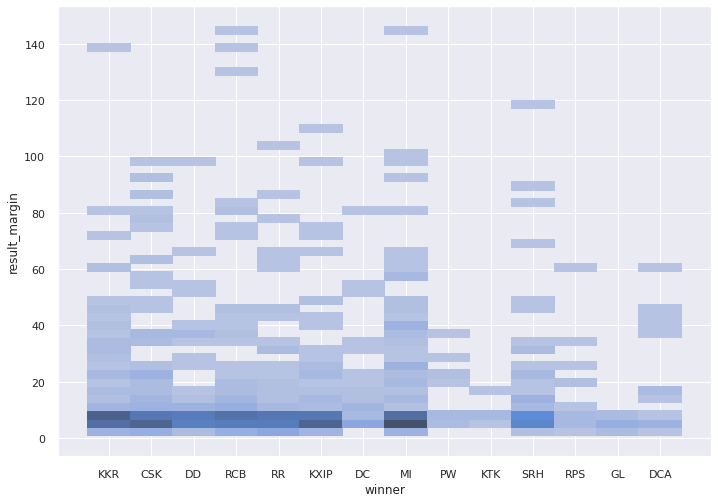

In [308]:
#different result margin from different team
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x='winner',y='result_margin',data=matches)

In [303]:
#neutral_venue feature
matches['neutral_venue'].value_counts()

0    739
1     77
Name: neutral_venue, dtype: int64

<IPython.core.display.Javascript object>

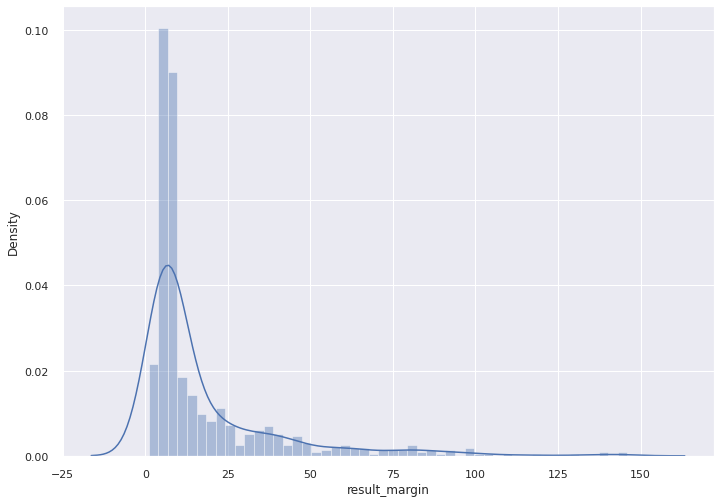

In [305]:
#result margin(distplot)
sns.distplot(matches['result_margin'])

<IPython.core.display.Javascript object>

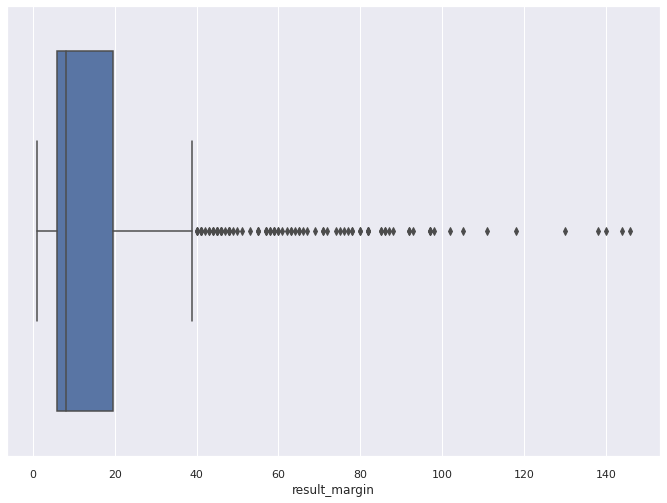

In [307]:
#result margin box plot
sns.boxplot(x=matches["result_margin"])

this eda will help in further processing.